In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

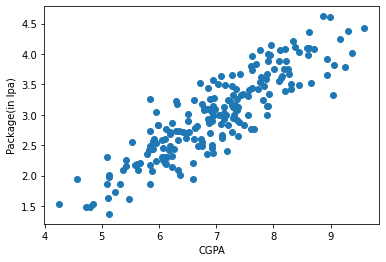

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,:1]
y = df.iloc[:,-1]

In [7]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [8]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression 

In [12]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=3)
lr=LinearRegression ()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

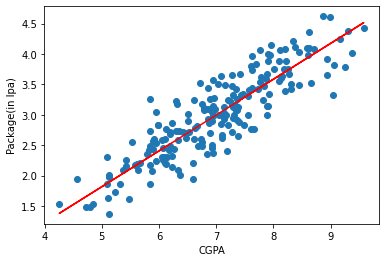

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [18]:
y_pred=lr.predict(X_test)

In [17]:
y_test.values

array([4.02, 3.79, 2.4 , 3.24, 2.87, 2.17, 2.72, 2.26, 2.35, 4.14, 3.03,
       3.49, 3.65, 2.69, 4.08, 2.56, 2.79, 3.67, 2.7 , 3.09, 3.42, 1.54,
       3.65, 2.6 , 2.08, 3.33, 3.34, 2.01, 3.52, 2.77, 2.92, 3.26, 3.04,
       3.42, 4.36, 2.57, 3.57, 3.62, 2.89, 2.18])

In [20]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 0.31001787170563705


In [19]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))


Mean Squared Error 0.14551953158290803


In [23]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 0.38147022371727524


In [25]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.651675487510094


In [26]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.6425090529708859

Now introduce one more column

In [61]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.683569,3.26
1,5.12,0.281301,1.98
2,7.82,0.307664,3.25
3,7.42,0.106664,3.67
4,6.94,0.073130,3.57


Text(0, 0.5, 'Package(in lpa)')

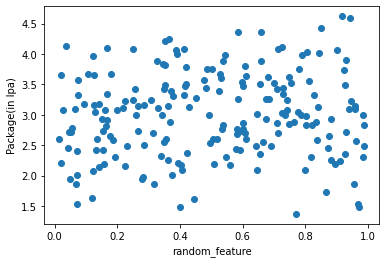

In [62]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [63]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [64]:
X.head()

,cgpa,random_feature
0,6.89,0.683569
1,5.12,0.281301
2,7.82,0.307664
3,7.42,0.106664
4,6.94,0.073130


In [65]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [67]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=2)
lr=LinearRegression ()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 0.263302724223762


In [69]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))


Mean Squared Error 0.10250273607840125


In [70]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 0.32016048487969473


In [71]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.8146976355987954


In [72]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.8098212575882373

In [73]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [74]:
new_df2.sample(5)

,cgpa,iq,package
110,8.18,3.66,3.76
112,8.58,5.20,4.10
75,6.97,2.18,3.28
47,5.84,3.16,3.26
184,7.88,3.44,3.14


Text(0, 0.5, 'Package(in lpa)')

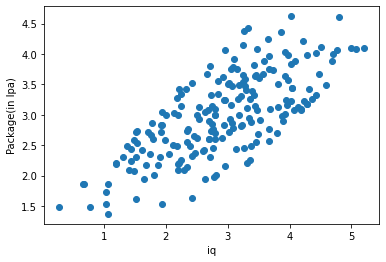

In [75]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [76]:
np.random.randint(-100,100)

82

In [77]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [80]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8299514809816015


In [81]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8207596691427692